In [1]:
#data analysis and scientific computing 
import numpy as np 
import pandas as pd 
#data visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#worked on three classifiers to check the better accuracy model 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
#import data 
df = pd.read_csv('Heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


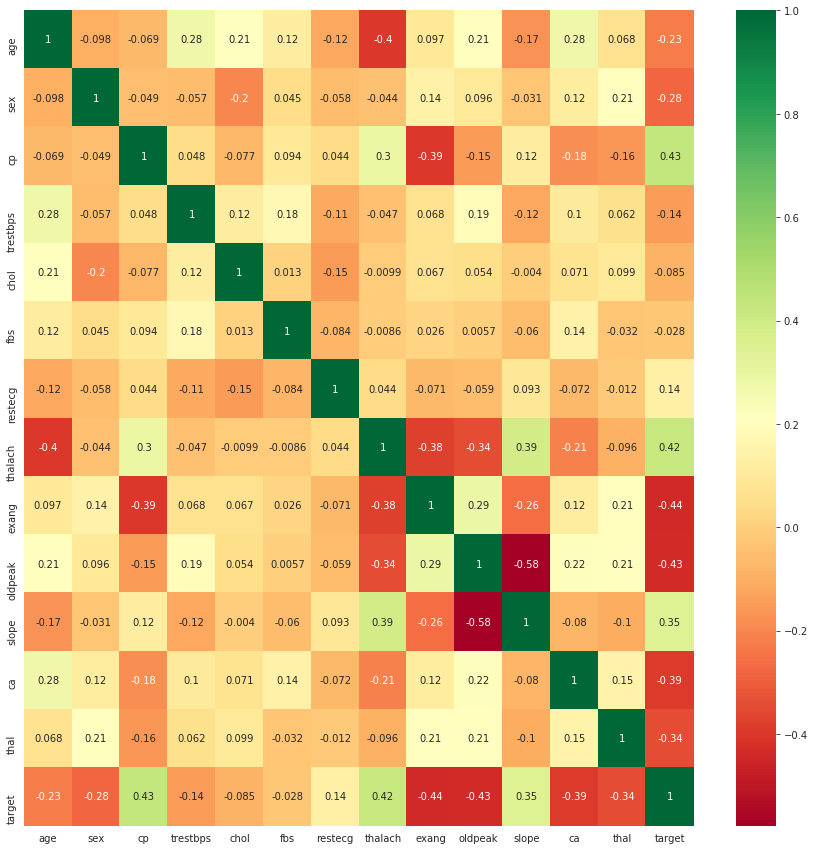

In [42]:
#feature selection 
import seaborn as sns
#correlations of features in the dataset 
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86c520d860>,
      dtype=object)

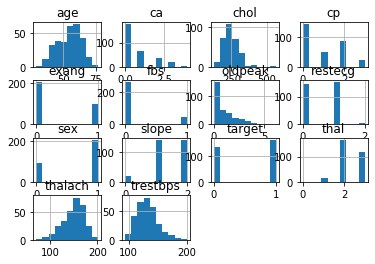

In [5]:
df.hist()

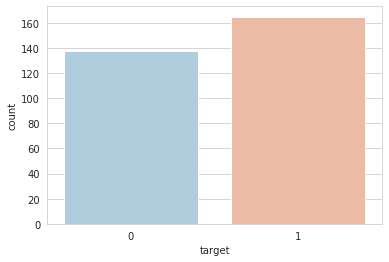

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [8]:
patient_suffered = dataset[dataset['target'] == 1]
patient_suffered['target'].count()

165

1    165
0    138
Name: target, dtype: int64

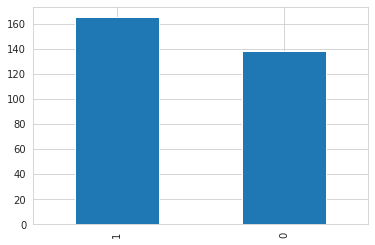

In [24]:
#total males and females 
df['target'].value_counts().plot(kind='bar')
df['target'].value_counts()

1    93
0    72
Name: sex, dtype: int64

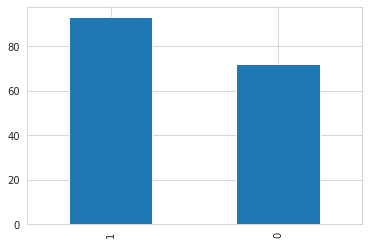

In [23]:
#after heart disease is detected 
dataset_final = df[df['target'] == 1]
dataset_final['sex'].value_counts().plot(kind='bar')
dataset_final['sex'].value_counts()

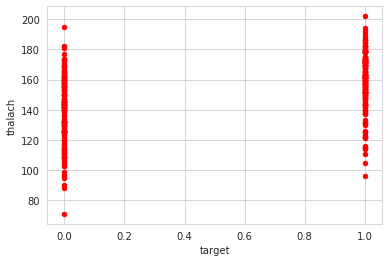

In [34]:
df.plot(kind='scatter',x='target',y='thalach',color='red')
plt.show()

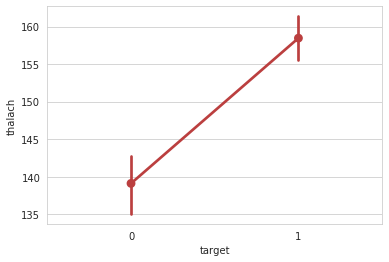

In [65]:
sns.pointplot("target", y="thalach", data=df,
                   color="#bb3f3f")

Text(0, 0.5, 'Frequency')

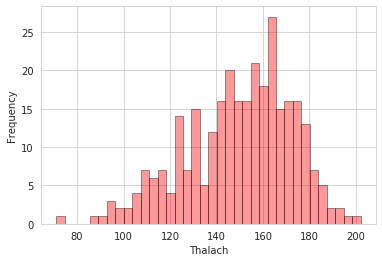

In [38]:
# matplotlib histogram
# plt.hist(df['thalach'], color = 'blue', edgecolor = 'black',
#          bins = int(180/5))

# seaborn histogram
sns.distplot(df['thalach'], hist=True, kde=False, 
             bins=int(180/5), color = 'red',
             hist_kws={'edgecolor':'black'})

plt.xlabel('Thalach')
plt.ylabel('Frequency')

In [45]:
max_age = df['age'].max()
min_age = df['age'].min()
mean_age = df['age'].mean()
(77, 29, 54.366336633663366)

In [46]:
max_age,min_age, mean_age

(77, 29, 54.366336633663366)

Text(0, 0.5, 'Frequency')

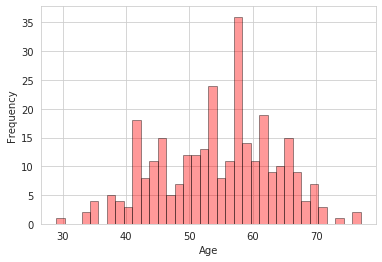

In [63]:
sns.distplot(df['age'], hist=True, kde=False, 
             bins=int(180/5), color = 'red',
             hist_kws={'edgecolor':'black'})

plt.xlabel('Age')
plt.ylabel('Frequency')


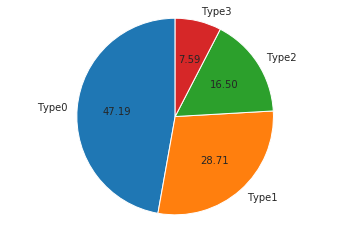

In [75]:
import matplotlib.pyplot as plotter

pieLabels= 'Type0','Type1','Type2','Type3'
res = df['cp'].value_counts()
figureObject, axesObject = plotter.subplots()
axesObject.pie(res,
        labels=pieLabels,
        autopct='%1.2f',
        startangle=90)
axesObject.axis('equal')
plotter.show()



In [107]:
non_disease = df[df['target'] == 0]
non_disease
disease_present = df[df['target'] == 1]
disease_present

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [81]:
non_disease['thalach'].max()

195

In [128]:
df['age'].nunique()

41

In [108]:
#young age people
young_age = disease_present[(disease_present.age>=29)&(disease_present.age<40)]
middle_age=disease_present[(disease_present.age>=40)&(disease_present.age<55)]
old_age=disease_present[(disease_present.age>55)]
young_age

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
44,44,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
58,58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
65,65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
72,72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
115,115,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
124,124,39,0,2,94,199,0,1,179,0,0.0,2,0,2,1
125,125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
154,154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1
157,157,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1


In [116]:
disease_present[(disease_present.age>=29)&(disease_present.age<40)].count()

index       12
age         12
sex         12
cp          12
trestbps    12
chol        12
fbs         12
restecg     12
thalach     12
exang       12
oldpeak     12
slope       12
ca          12
thal        12
target      12
dtype: int64

No handles with labels found to put in legend.


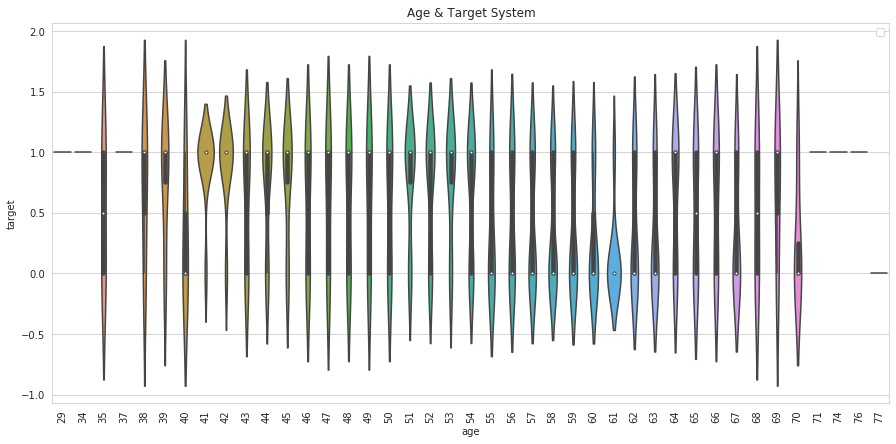

In [111]:
plt.figure(figsize=(15,7))
sns.violinplot(x=df.age,y=df.target)
plt.xticks(rotation=90)
plt.legend()
plt.title("Age & Target System")
plt.show()

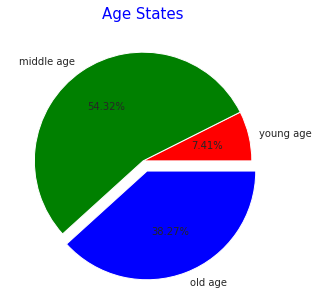

In [117]:
colors = ['red','green','blue']
explode = [0,0,0.1]
plt.figure(figsize = (5,5))
#plt.pie([target_0_agerang_0,target_1_agerang_0], explode=explode, labels=['Target 0 Age Range 0','Target 1 Age Range 0'], colors=colors, autopct='%1.1f%%')
plt.pie([len(young_age),len(middle_age),len(old_age)],labels=['young age','middle age','old age'],explode=explode,colors=colors, autopct='%1.2f%%')
plt.title('Age States',color = 'blue',fontsize = 15)
plt.show()

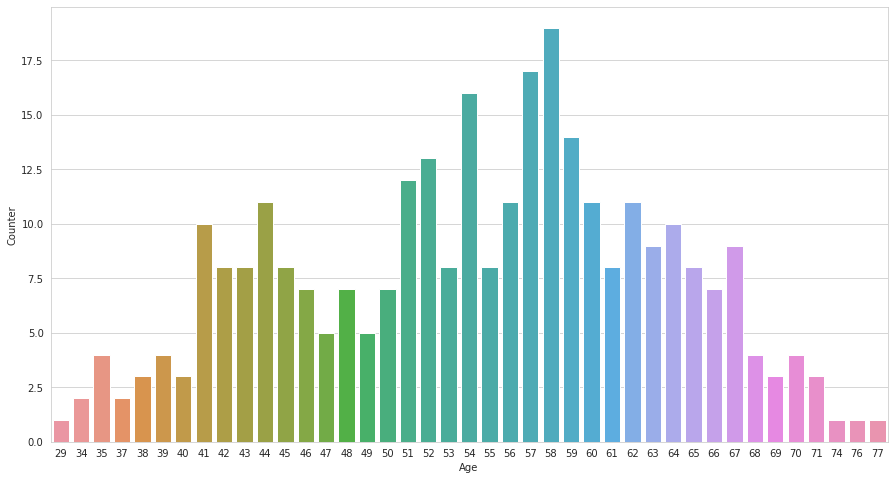

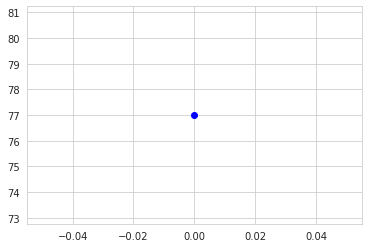

In [139]:
plt.figure(figsize=(15,8))
sns.barplot(x=df.age.value_counts()[:41].index,y=df.age.value_counts()[:41].values)
plt.xlabel('Age')
plt.ylabel('Counter')
plt.show()
plt.plot(max_age, '--bo')


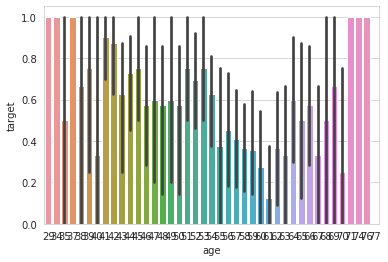

In [93]:
sns.barplot(x=df['age'],y=df['target'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [ ]:
dataset.columns

In [ ]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [ ]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

In [ ]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 10)
score=cross_val_score(knn_classifier,X,y,cv=10)
score.mean()

In [ ]:
randomforest_classifier= RandomForestClassifier(n_estimators=50)
score=cross_val_score(randomforest_classifier,X,y,cv=10)
score.mean()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
from sklearn import tree

model = tree.DecisionTreeClassifier()

In [ ]:
model

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

In [ ]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

In [ ]:
from sklearn import neighbors, datasets, preprocessing

x_normalized = preprocessing.scale(X)

xTrain, xTest, yTrain, yTest = train_test_split(x_normalized, y, test_size=0.21, random_state=29)

knn = KNeighborsClassifier(6)
knn.fit(xTrain, yTrain)
predictions = knn.predict(xTest)

print('accuracy is :',accuracy_score(yTest, predictions)*100)

plt.scatter(yTest, predictions)
plt.xlabel('ytest')
plt.ylabel('predictions')
plt.show()